In [7]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [9]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [10]:
html = browser.html
data_soup = soup(html, 'html.parser')
data_elem = data_soup.find_all('div', class_='container')

In [11]:
data_list=[]

In [12]:

for data_soup in data_elem:
    print(data_soup)
data_list

<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<svg class="me-2" height="32" role="img" viewbox="0 0 118 94" width="40" xmlns="http://www.w3.org/2000/svg">
<title>Bootstrap</title>
</svg>
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<

[]

In [13]:
data_df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
data_df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [14]:
data_df= data_df[0]
data_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [15]:
data_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [16]:
#Convert id from int 64 to object
data_df['id'] =data_df.id.astype(object)

In [17]:
#convert terrestial_date object to datetime64
data_df['terrestrial_date']=pd.to_datetime(data_df['terrestrial_date'], format='%Y-%m-%d')

In [18]:
data_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [19]:
data_df.month.unique()



array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5], dtype=int64)

In [20]:
data_df.month.value_counts().sort_index(ascending=True)


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [21]:
data_df.month.count()

1867

In [22]:
data_df.describe()

,sol,ls,month,min_temp,pressure
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,1015.670059,168.865024,6.141939,-76.121050,841.066417
std,565.342298,105.599153,3.506493,5.504098,54.253226
min,10.000000,0.000000,1.000000,-90.000000,727.000000
25%,546.500000,78.000000,3.000000,-80.000000,800.000000
50%,1028.000000,160.000000,6.000000,-76.000000,853.000000
75%,1505.500000,257.500000,9.000000,-72.000000,883.000000
max,1977.000000,359.000000,12.000000,-62.000000,925.000000


In [23]:
data_df.min_temp.mean()

-76.12104981253347

In [24]:
data_df.groupby('month',as_index=True).mean()

,sol,ls,min_temp,pressure
month,,,,
1,1077.574713,15.281609,-77.160920,862.488506
2,1175.853933,44.258427,-79.932584,889.455056
3,1204.406250,75.010417,-83.307292,877.322917
4,1244.500000,104.365979,-82.747423,806.329897
5,1182.691275,132.885906,-79.308725,748.557047
6,750.829932,164.897959,-75.299320,745.054422
7,715.105634,194.894366,-72.281690,795.105634
8,795.333333,224.347518,-68.382979,873.829787
9,861.186567,254.052239,-69.171642,913.305970


In [25]:
new_data_df=data_df.groupby('month',as_index=True).mean()
avg_min_temp=new_data_df.drop(['sol','ls','pressure'], axis=1)


In [26]:
avg_min_temp

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


<AxesSubplot:xlabel='month'>

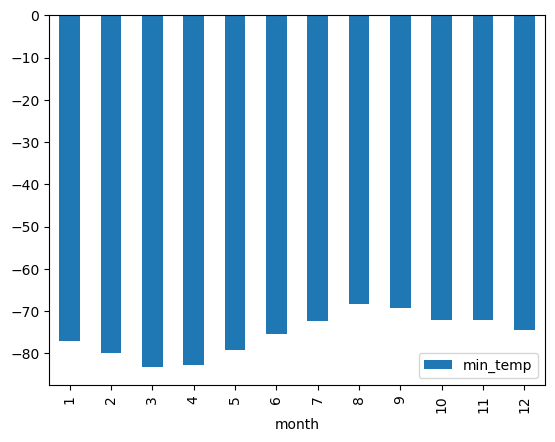

In [27]:
avg_min_temp.plot.bar()

In [28]:
min_temp_by_month = data_df.groupby('month')['min_temp'].mean()
print(min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


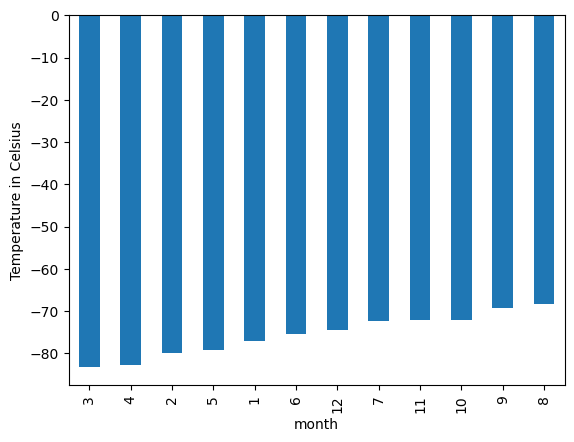

In [29]:
min_temp_by_month.sort_values().plot(kind='bar')
plt.ylabel('Temperature in Celsius')
plt.show()

In [30]:
pressure_df=new_data_df.drop(['sol','ls','min_temp'], axis=1)
pressure_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


<AxesSubplot:xlabel='month'>

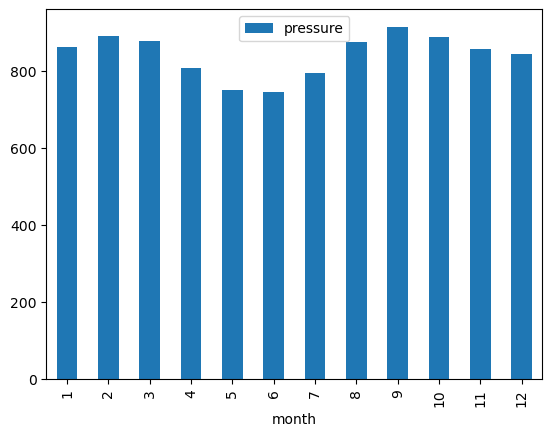

In [34]:
pressure_df.plot.bar()


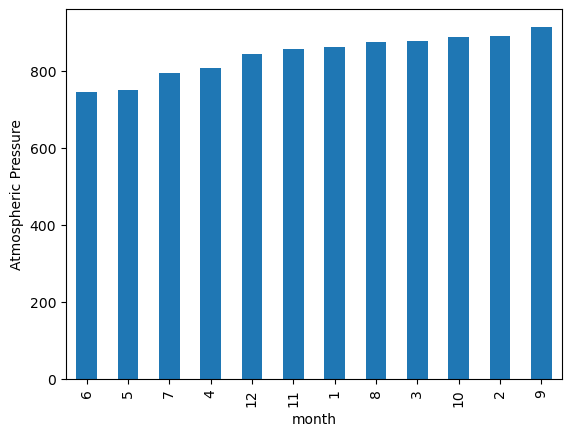

In [41]:
# Plot the average pressure by month
pressure_by_month.sort_values().plot(kind='bar')
plt.ylabel('Atmospheric Pressure')
plt.show()

In [36]:
# 4. Average pressure by Martian month
pressure_by_month = data_df.groupby('month')['pressure'].mean()
print(pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


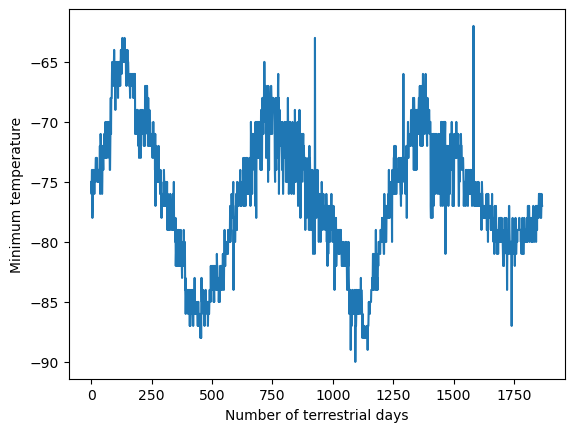

In [37]:
data_df.min_temp.plot()
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.show()

In [38]:
data_df.to_csv('C:/Users/Maria/Desktop/Class_Folder/Mission_to_Mars/data_df.csv')

In [39]:
new_data_df.to_csv('C:/Users/Maria/Desktop/Class_Folder/Mission_to_Mars/clean_df.csv')

In [40]:
pressure_df.to_csv('C:/Users/Maria/Desktop/Class_Folder/Mission_to_Mars/pressure_df.csv')